# Mathematical Modeling of Mitochondrial Retrograde Response
Documentation: [Mathematical-modeling-of-retrograde-signalling](Mathematical-modeling-of-retrograde-signalling.md)

In [1]:
from sympy import *
import numpy as np
from scipy.integrate import odeint
#init_printing(use_latex='png') #Print latex in sympy
init_printing() 

## List of channel Parameters

In [2]:
# time
t = Symbol('t') 
# Input Signal
s = Symbol('s', Function=True)(t)
# Vector form of channel V
v = []
# v = [v1,...,v16]
v.append( Symbol('[Rtg2]_{C}^{ina}',Function=True)(t) )      
v.append( Symbol('[Rtg2]_{C}^{act}',Function=True)(t) )      
v.append( Symbol('[Rtg3]_{C}^{P}',Function=True)(t)   )
v.append( Symbol('[Rtg3]_{C}^{U}',Function=True)(t) )
v.append( Symbol('[Rtg3]_{N}^{P}',Function=True)(t) )
v.append( Symbol('[Rtg3]_{N}^{U}',Function=True)(t) )
v.append( Symbol('[Rtg1]_{C}',Function=True)(t) )
v.append( Symbol('[Rtg1]_{N}',Function=True)(t) )
v.append( Symbol('[Rtg1/3]_{C}^{P}',Function=True)(t) )
v.append( Symbol('[Rtg1/3]_{C}^{U}',Function=True)(t) )
v.append( Symbol('[Rtg1/3]_{N}^{P}',Function=True)(t) )
v.append( Symbol('[Rtg1/3]_{N}^{U}',Function=True)(t) )
v.append( Symbol('[Bmh]_{C}',Function=True)(t) )
v.append( Symbol('[Bmh-Mks1]_{C}',Function=True)(t) )
v.append( Symbol('[Mks1-Rtg2]_{C}^{ina}',Function=True)(t) )
v.append( Symbol('[Mks1-Rtg2]_{C}^{act}',Function=True)(t) )
v.append( Symbol('[Mks1]_{C}',Function=True)(t) )

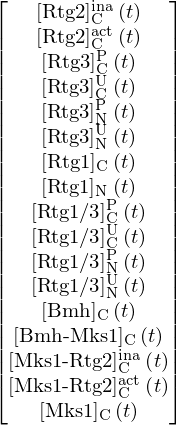

In [3]:
# List index in math and sympy vector 
Matrix(v)

## Reactions of RTG pathway

In [4]:
str(v[15])[:-3]

'[Mks1-Rtg2]_{C}^{act}'

### Functions of converting reaction to vector form

In [5]:
# Converting operation
def to_stoi_matrix(reactions, products, v, **kwags):
    stoi_vecs = np.array([])
    for reac, prod in zip(reactions, products):
        stoi_vecs = np.append(stoi_vecs, to_stoi_vec(reac,prod,v))
    stoi_m = stoi_vecs.reshape(len(reactions),-1)
    return np.matrix(stoi_m.transpose())
    
def to_stoi_vec(reac, prod, v):
    """
    Convert reaction to stoichiometry vector form N = arr*V
    Argument:
            reac: sympy expression for reagents
            prod: sympy expression for products
            v:    list of all chemical component
    Return:        
            arr:  linear combination vector for v
    """
    t = Symbol('t')
    reac_dic = reac.as_coefficients_dict() # Ouput dictionary of algebraic and coefficients
    prod_dic = prod.as_coefficients_dict()
    arr = np.zeros(len(v))
    # Replace regents' coefficients
    for item in reac_dic.keys():
        index = v.index(Symbol(str(item)[:-3],Function=True)(t))
        arr[index] = -1 * reac_dic[item] # create vector
    # Replace products' coefficients. multiply with -1
    for item in prod_dic.keys():
        index = v.index(Symbol(str(item)[:-3],Function=True)(t))
        arr[index] = 1 * prod_dic[item] # create vector
    return arr

# Interaction model
def hill(s, k, ka, n):
    """
    Mathematical Equation of Hill function for Sympy alegraic computaton
    
    Argument:
            s:  substrate 
            k:  raction rate
            ka: dissociaton constant
            n:  hill coefficient
    
    Return:
            hillexp: sympy expression 
    """
    hillexp = k * ((s ** n) / (ka + s ** n))
    return hillexp

# List of reactions
def r1(v, s, k1, ka1, n1, **param):
    reac = v[1-1]
    prod = v[2-1]
    rate = hill(s, k1, ka1, n1)
    return reac, prod, rate

def r2(v, k2, **param):
    reac = v[2-1]
    prod = v[1-1]
    rate = v[2-1] * k2
    return reac, prod, rate

def r3(v, k3, kn3, **param):
    reac = v[17-1] + v[1-1]
    prod = v[15-1]
    rate = k3 * v[17-1] * v[1-1] - kn3 * v[15-1]
    return reac, prod, rate

def r4(v, k4, kn4, **param):
    reac = v[17-1] + v[2-1]
    prod = v[16-1]
    rate = k4 * v[17-1] * v[2-1] - kn4 * v[16-1]
    return reac, prod, rate

def r5(v, k5, kn5, **param):
    reac = v[17-1] + v[13-1]
    prod = v[14-1]
    rate = k5 * v[17-1] * v[13-1] - kn5 * v[14-1]
    return reac, prod, rate

def r6(v, k6, ka6, n6, **param):
    reac = v[4-1]
    prod = v[3-1]
    rate = hill(v[14-1],k6,ka6,n6)
    return reac, prod, rate

def r7(v, k7, **param):
    reac = v[3-1]
    prod = v[4-1]
    rate = k7 * v[3-1]
    return reac, prod, rate

def r8(v, k8, kn8, **param):
    reac = v[5-1]
    prod = v[6-1]
    rate = k8 * v[5-1] - kn8 * v[6-1]
    return reac, prod, rate

def r9(v, k9, kn9, **param):
    reac = v[4-1]
    prod = v[6-1]
    rate = k9 * v[4-1] - kn9 * v[6-1]
    return reac, prod, rate

def r10(v, k10, kn10, **param): 
    reac = v[3-1]
    prod = v[5-1]
    rate = k10 * v[3-1] - kn10 * v[5-1]
    return reac, prod, rate

def r11(v, k11, kn11, **param):
    reac = v[4-1] + v[7-1]
    prod = v[10-1]
    rate = k11 * v[4-1] * v[7-1] - kn11 * v[10-1]
    return reac, prod, rate

def r12(v, k12, kn12, **param):
    reac = v[3-1] + v[7-1]
    prod = v[9-1]
    rate = k12 * v[3-1] * v[7-1] - kn12 * v[9-1]
    return reac, prod, rate

def r13(v, k13, kn13, **param):
    reac = v[6-1] + v[8-1]
    prod = v[12-1]
    rate = k13 * v[6-1] * v[8-1] - kn13 * v[12-1]
    return reac, prod, rate

def r14(v, k14, kn14, **param):
    reac = v[5-1] + v[8-1]
    prod = v[11-1]
    rate = k14 * v[5-1] * v[8-1] - kn14 * v[11-1]
    return reac, prod, rate

def r15(v, k15, kn15, **param):
    reac = v[10-1]
    prod = v[12-1]
    rate = k15 * v[10-1] - kn15 * v[12-1]
    return reac, prod, rate

def r16(v, k16, kn16, **param):
    reac = v[9-1]
    prod = v[11-1]
    rate = k16 * v[9-1] - kn16 * v[11-1]
    return reac, prod, rate

## Stoichiometry matrix

Turorial: [Introduction of Stoichiometry matrix](https://en.wikipedia.org/wiki/Stoichiometry)
Also see: [Reactions of RTG Pathway](Mathematical-modeling-of-retrograde-signalling.md)

$\frac{d\vec{S}}{dt} = \textbf{N}\vec{r}$

$r = (rate1,...,rate_m)$

$s = (s_1,...,s_n)$

N = n x m matrix

|Notation|name|
|---|---|
|N|stoichiometry matrix|
|r|rate vector|
|S|species vector|

### Reactions

In [6]:
reactions = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16]

### Parameters

In [7]:
param = {
    'k1': Symbol('k1'),
    'ka1':Symbol('ka1'),
    'n1': Symbol('n1'),
    'k2': Symbol('k2'),
    'k3': Symbol('k3'),
    'kn3':Symbol('kn3'),
    'k4': Symbol('k4'),
    'kn4':Symbol('kn4'),
    'k5': Symbol('k5'),
    'kn5':Symbol('kn5'),
    'k6': Symbol('k6'),
    'ka6':Symbol('ka6'),
    'n6':Symbol('n6'),
    'k7':Symbol('k7'),
    'k8':Symbol('k8'),
    'kn8':Symbol('kn8'),
    'k9':Symbol('k9'),
    'kn9':Symbol('kn9'),
    'k10':Symbol('k10'),
    'kn10':Symbol('kn10'),
    'k11':Symbol('k11'),
    'kn11':Symbol('kn11'),
    'k12':Symbol('k12'),
    'kn12':Symbol('kn12'),
    'k13':Symbol('k13'),
    'kn13':Symbol('kn13'),
    'k14':Symbol('k14'),
    'kn14':Symbol('kn14'),
    'k15':Symbol('k15'),
    'kn15':Symbol('kn15'),
    'k16':Symbol('k16'),
    'kn16':Symbol('kn16'),
}


### Stoicshiometry Matrix

In [8]:
# Retrive reagents, products, rates
reacs = [] 
prods = []
rates = []
reac, prod, rate  = reactions[0](v, s,**param)
reacs.append(reac); prods.append(prod); rates.append(rate)
for reaction in reactions[1:]:
    reac, prod, rate = reaction(v, **param)
    reacs.append(reac); prods.append(prod); rates.append(rate)

# RTG Pathway reaction info
rtg_reactions = {
    'reactions': reacs,
    'products': prods,
    'rates': rates,
    'v': v
}
# Stoichiometry Matrix
stoi_m = to_stoi_matrix(**rtg_reactions)

In [9]:
print('The stoichiometry matrix of RTG Pathway','\n','  R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 R11 R12 R13 R14 R15 R16')
print(stoi_m)

The stoichiometry matrix of RTG Pathway 
   R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 R11 R12 R13 R14 R15 R16
[[-1.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.  0.  0. -1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0. -1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. 

### Rate Vector

In [10]:
rate_m = np.matrix(rates).transpose()

In [11]:
# tuple(rate_m.tolist())

## first order of species

$\frac{d}{dt}\vec{S} = \textbf{N} \textbf{R}$

In [12]:
# ODE system
ds = stoi_m * rate_m
#eqs = Eq(diff(s,t),0)
#eqs = Eq(0,0)
ode_v = [] 
for i in range(0, ds.shape[0]):
    #ode_v.append(Eq(diff(v[i],t),ds[i,0]))
    ode_v.append(Eq(0,ds[i,0]))

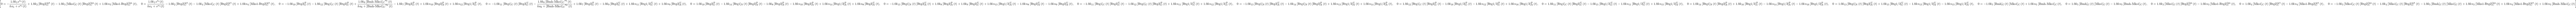

In [14]:
ode_v

In [ ]:
%%time
sol_steady = solve([ode_v[0], ode_v[1],ode_v[2], ode_v[3],ode_v[4], ode_v[5],ode_v[6], ode_v[7],
      ode_v[8], ode_v[9],ode_v[10], ode_v[11],ode_v[12], ode_v[13],ode_v[14], ode_v[15], ode_v[16] ],v)

with open("sol_steady.txt", "w") as outf:
    for i in sol_steady:
        print(str(i))
        outf.write(str(i))

## State-space system 

References: [Scipy tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html), [from state-space to transfer function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ss2tf.html)

A system can be linearized by the following equations:

$\frac{d}{dt}\textbf{x} = f(\textbf{x}(t),\textbf{u}(t)) = \textbf{A}x(t) + \textbf{B}u(t) $

$y(t) = h(\textbf{x}(t),\textbf{u}(t)) = \textbf{C}x(t) + \textbf{D}u(t)$

In [16]:
# Matrix A
y_a = Matrix(v)
x_a = Matrix(ds)
A = x_a.jacobian(y_a)

# Matrix B
y_b = Matrix([s])
x_b = Matrix(ds)
B = x_b.jacobian(y_b)

# Matrix C
C = Matrix([[0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0]]).T # Sum of Rtg1/3 in nucleus

# Matrix D

D = Matrix([0])

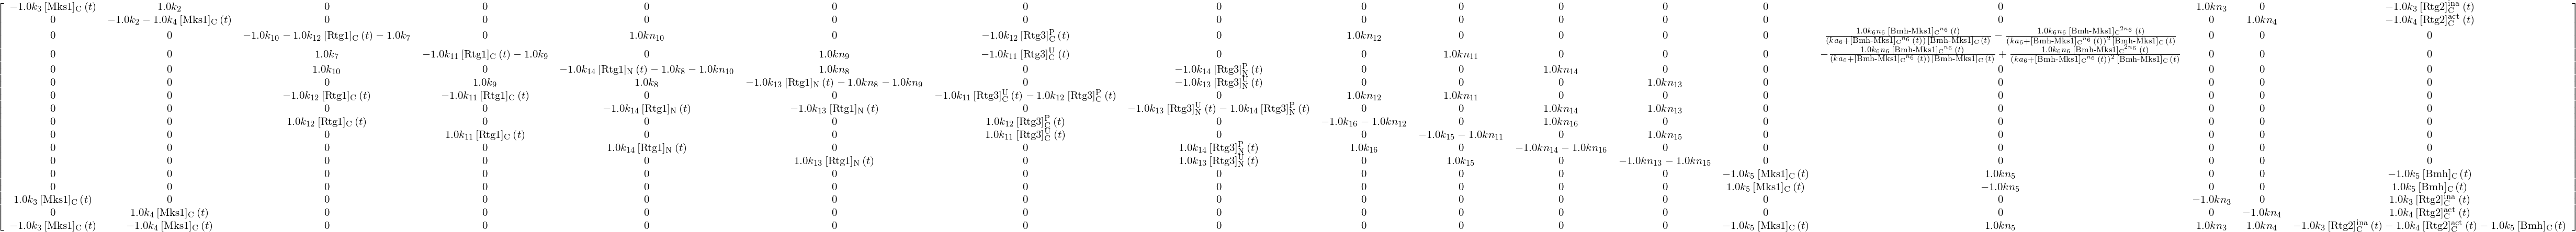

In [21]:
A

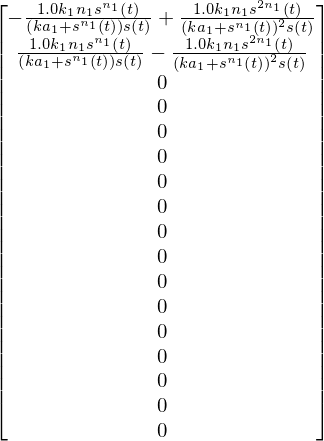

In [22]:
B

In [19]:
C

In [20]:
D

In [260]:
from scipy.signal import ss2tf
# ss2tf(A,B,C,D)